In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
td = pd.read_csv('/content/drive/MyDrive/Quantium Analytics Project/QVI_transaction_data.csv')
cd = pd.read_csv('/content/drive/MyDrive/Quantium Analytics Project/QVI_purchase_behaviour.csv')

## Exploratory Data Analysis Transaction Data

In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
cd.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Converting date from int format that are in excel serial dates to date_time format

td['DATE'] = pd.to_datetime(td['DATE'], origin='1900-01-01', unit='D')

In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
td['PROD_NAME'].describe()

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [ ]:
td['PROD_NAME'].sample(10)

,PROD_NAME
225979,Grain Waves Sweet Chilli 210g
160778,Kettle 135g Swt Pot Sea Salt
149835,Cheezels Cheese 330g
30742,Red Rock Deli SR Salsa & Mzzrlla 150g
101058,Woolworths Medium Salsa 300g
37173,Twisties Cheese 270g
44896,Smiths Crinkle Original 330g
164047,Grain Waves Sweet Chilli 210g
142989,Twisties Chicken270g
181133,Kettle Sensations Camembert & Fig 150g


In [ ]:
# Get the value counts of all products in PROD_NAME
frequency = td['PROD_NAME'].value_counts()

# Specify the product name you're interested in
product_name = "Pringles SourCream Onion 134g"

# Get the frequency of the specific product
count = frequency.get(product_name, 0)  # Returns 0 if the product is not found

# Print the frequency of the product
print(f"The product '{product_name}' appears {count} times in the dataset.")


The product 'Pringles SourCream Onion 134g' appears 0 times in the dataset.


In [ ]:
# Split the unique product names into individual words
product_words = pd.Series(td['PROD_NAME'].unique()).str.split(' ').explode().reset_index(drop=True)

# Display the words
print(product_words)



0      Natural
1         Chip
2             
3             
4             
        ...   
818    Doritos
819      Salsa
820       Mild
821           
822       300g
Length: 823, dtype: object


In [ ]:
# Remove digits and special characters using regex
cleaned_words = product_words[~product_words.str.contains(r'\d|[^\w\s]', regex=True)]
cleaned_words = cleaned_words[cleaned_words.str.strip() != '']
# Count the frequency of the remaining words
word_frequency = cleaned_words.value_counts()

# Sort by frequency in descending order
sorted_word_frequency = word_frequency.sort_values(ascending=False)

# Display the sorted word frequencies
print(sorted_word_frequency)

Chips        21
Smiths       16
Crinkle      14
Cut          14
Kettle       13
             ..
Vingar        1
Veg           1
Strws         1
Mango         1
Bolognese     1
Name: count, Length: 168, dtype: int64


In [ ]:
td['SALSA'] = td['PROD_NAME'].str.contains('salsa', case=False, na=False)

# Filter out the rows where SALSA is True (i.e., salsa products)
td = td[td['SALSA'] == False].drop(columns=['SALSA'])

print(td)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-19          1            1000       1         5   
1      2019-05-16          1            1307     348        66   
2      2019-05-22          1            1343     383        61   
3      2018-08-19          2            2373     974        69   
4      2018-08-20          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-11        272          272319  270088        89   
264832 2018-08-15        272          272358  270154        74   
264833 2018-11-08        272          272379  270187        51   
264834 2018-12-29        272          272379  270188        42   
264835 2018-09-24        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [ ]:
print(td.describe())
print("____________________________________")
print(td.isnull().sum())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2019-01-01 01:19:01.211467776     135.051098    1.355310e+05   
min              2018-07-03 00:00:00       1.000000    1.000000e+03   
25%              2018-10-02 00:00:00      70.000000    7.001500e+04   
50%              2019-01-01 00:00:00     130.000000    1.303670e+05   
75%              2019-04-02 00:00:00     203.000000    2.030840e+05   
max              2019-07-02 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

No null values in the columns but the product quantity column likely has an outlier where 200 packets of chips are bought in one transaction.

In [ ]:
td[td['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.

In [ ]:
td[td['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


After checking if any other transactions made by that customer only 2 transactions were done over the year and cannot be considered as an ordinary retail customer. Since the customer had very few transactions he might be buying chips for commercial purposes instead. Therefore let's remove this loyalty card number from further analysis.

In [ ]:
customer_id_to_remove = 226000

td.drop(td[td['LYLTY_CARD_NBR'] == customer_id_to_remove].index, inplace=True)


In [ ]:
td.shape

(246740, 8)

In [ ]:
transaction_count_by_date = td.groupby('DATE').size()
transaction_count_by_date_df = transaction_count_by_date.reset_index(name='TXN_COUNT')
transaction_count_by_date_df

,DATE,TXN_COUNT
0,2018-07-03,663
1,2018-07-04,650
2,2018-07-05,674
3,2018-07-06,669
4,2018-07-07,660
...,...,...
359,2019-06-28,657
360,2019-06-29,669
361,2019-06-30,673
362,2019-07-01,703


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.


In [ ]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Convert the date range to a DataFrame
date_range_df = pd.DataFrame(date_range, columns=['DATE'])

# Merge with the transaction count (fill missing dates with 0)
merged_data = pd.merge(date_range_df, transaction_count_by_date_df, how='left', on='DATE')
merged_data['TXN_COUNT'].fillna(0, inplace=True)

fig = px.line(
    merged_data,
    x='DATE',
    y='TXN_COUNT',
    title='Transaction Count Over Time (1 Jul 2018 to 30 Jun 2019)',
    labels={'DATE': 'Date', 'TXN_COUNT': 'Transaction Count'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Transaction Count',
    xaxis_tickangle=45,
    template='plotly',
    plot_bgcolor='white',
    showlegend=False
)
fig.show()



# Optionally: Print dates where there are missing transactions (TXN_COUNT == 0)
missing_dates = merged_data[merged_data['TXN_COUNT'] == 0]['DATE']
print(f"Missing Dates: {missing_dates}")

<ipython-input-23-8583e1ac551d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['TXN_COUNT'].fillna(0, inplace=True)


Missing Dates: 0     2018-07-01
1     2018-07-02
179   2018-12-27
Name: DATE, dtype: datetime64[ns]


From the above Plot we can see there is an increase in purchases in December and a break in late December. So let's deep dive into December and see what caused this.

In [ ]:
merged_data['MONTH'] = merged_data['DATE'].dt.month
merged_data['DAY'] = merged_data['DATE'].dt.day

# Filter for December (month = 12)
december_data = merged_data[merged_data['MONTH'] == 12]

# Group by day in December to get the transaction count for each day
december_data_grouped = december_data.groupby(['DAY'])['TXN_COUNT'].sum().reset_index()

# Create a Plotly line plot for December with markers
fig = px.line(
    december_data_grouped,
    x='DAY',
    y='TXN_COUNT',
    title='Transaction Count in December (1 Dec to 31 Dec)',
    labels={'DAY': 'Day', 'TXN_COUNT': 'Transaction Count'},
    markers=True  # Add markers on each data point
)

# Customize the plot (rotate x-axis labels, add grid)
fig.update_layout(
    xaxis_title='Day of December',
    yaxis_title='Transaction Count',
    xaxis_tickangle=45,
    template='plotly',
    plot_bgcolor='white',
    showlegend=False
)

# Show the plot
fig.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

In [ ]:
import re

def extract_pack_size(prod_name):
    match = re.search(r'(\d+)\s*(g|kg)', prod_name.lower())  # regex to find number and 'g' or 'kg'
    if match:
        return int(match.group(1))  # Extract the number as pack size
    return None

td['PACK_SIZE'] = td['PROD_NAME'].apply(extract_pack_size)

print(td[['PROD_NAME', 'PACK_SIZE']].head())

                                  PROD_NAME  PACK_SIZE
0    Natural Chip        Compny SeaSalt175g        175
1                  CCs Nacho Cheese    175g        175
2    Smiths Crinkle Cut  Chips Chicken 170g        170
3    Smiths Chip Thinly  S/Cream&Onion 175g        175
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g        150


creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.

In [ ]:
pack_size_counts = td['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'COUNT']

# Sort by PACK_SIZE to check the values
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

In [ ]:
print(pack_size_counts)

    PACK_SIZE  COUNT
17         70   1507
13         90   3008
3         110  22387
19        125   1454
2         134  25102
11        135   3257
1         150  40203
15        160   2970
5         165  15297
4         170  19983
0         175  66390
18        180   1468
14        190   2995
10        200   4473
9         210   6272
16        220   1564
12        250   3169
8         270   6285
6         330  12540
7         380   6416


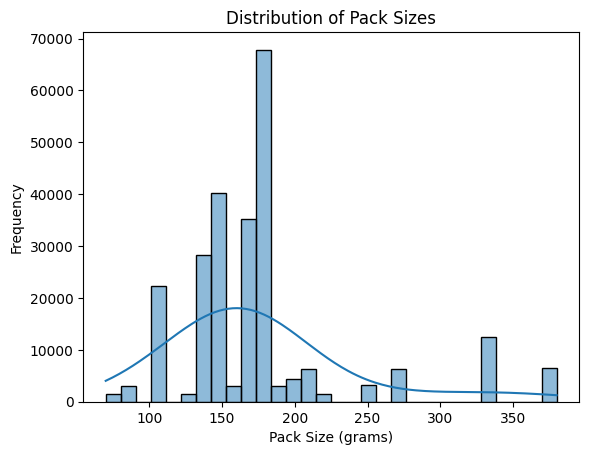

In [ ]:
sns.histplot(pack_size_counts, x='PACK_SIZE', weights='COUNT', bins=30, kde=True)
plt.yscale('linear')
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')
plt.show()

Now to create brands, we can use the first word in PROD_NAME to work out the brand
name..

In [ ]:
# Using regex to extract the first word (brand) from PROD_NAME
td['BRAND'] = td['PROD_NAME'].str.extract(r'(^\S+)')

# Display the first few rows to verify
print(td[['PROD_NAME', 'BRAND']].head())



                                  PROD_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle


In [ ]:
td['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


In [ ]:
brand_mapping = {
    'Red': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites'

}

td['BRAND'] = td['BRAND'].replace(brand_mapping)

td['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,30353
Doritos,25224
Pringles,25102
Red Rock Deli,16321
Infuzions,14201
Thins,14075
WW,10320
Cobs,9693


## Exploratory Data Analysis Customer Data

In [ ]:
cd.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
print("LIFESTAGE Distribution:")
print(pd.DataFrame(cd['LIFESTAGE'].value_counts()))
print("___________________________________________")
print("\nPREMIUM_CUSTOMER Distribution:")
print(pd.DataFrame(cd['PREMIUM_CUSTOMER'].value_counts()))

LIFESTAGE Distribution:
                        count
LIFESTAGE                    
RETIREES                14805
OLDER SINGLES/COUPLES   14609
YOUNG SINGLES/COUPLES   14441
OLDER FAMILIES           9780
YOUNG FAMILIES           9178
MIDAGE SINGLES/COUPLES   7275
NEW FAMILIES             2549
___________________________________________

PREMIUM_CUSTOMER Distribution:
                  count
PREMIUM_CUSTOMER       
Mainstream        29245
Budget            24470
Premium           18922


In [ ]:
cd.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
fig_lifestage = px.histogram(cd, x='LIFESTAGE', color='LIFESTAGE',
                             title='Distribution of LIFESTAGE',
                             labels={'LIFESTAGE': 'Lifestages', 'count': 'Count'},
                             category_orders={'LIFESTAGE': cd['LIFESTAGE'].unique().tolist()})
fig_lifestage.update_xaxes(tickangle=45)
fig_lifestage.show()

In [ ]:
fig_premium_customer = px.histogram(cd, x= 'PREMIUM_CUSTOMER', color= 'PREMIUM_CUSTOMER',
                                    title= 'Distribution of Premium Customer',
                                    labels= {'PREMIUM_CUSTOMER': 'Premium Customer Status', 'count' : 'cOUNT'},
                                    category_orders= {'PREMIUM_CUSTOMER': cd['PREMIUM_CUSTOMER'].unique().tolist()})
fig_premium_customer.update_xaxes(tickangle=45)

fig_premium_customer.show()

In [ ]:
cd.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
all_data = pd.merge(td, cd, how='left', left_on='LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR')

all_data.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
96998,2019-04-14,67,67214,65099,46,Kettle Original 175g,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Mainstream
23677,2018-09-08,15,15187,13869,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,NEW FAMILIES,Budget
35326,2019-01-13,66,66322,63740,36,Kettle Chilli 175g,2,10.8,175,Kettle,OLDER FAMILIES,Budget
29851,2019-03-03,259,259126,258269,36,Kettle Chilli 175g,2,10.8,175,Kettle,NEW FAMILIES,Premium
178328,2018-10-05,91,91256,90139,81,Pringles Original Crisps 134g,2,7.4,134,Pringles,YOUNG FAMILIES,Budget
178724,2019-05-06,97,97024,96419,97,RRD Salt & Vinegar 165g,2,6.0,165,Red Rock Deli,YOUNG FAMILIES,Budget
236489,2019-03-11,210,210193,209746,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream
148712,2019-01-28,110,110207,112838,68,Pringles Chicken Salt Crips 134g,2,7.4,134,Pringles,RETIREES,Mainstream
163984,2019-01-15,79,79269,77909,51,Doritos Mexicana 170g,2,8.8,170,Doritos,RETIREES,Premium
65622,2019-01-25,23,23099,19355,97,RRD Salt & Vinegar 165g,2,6.0,165,Red Rock Deli,OLDER FAMILIES,Premium


In [ ]:
all_data.shape

(246740, 12)

In [ ]:
all_data[all_data['LYLTY_CARD_NBR'].isnull()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

# Data Analysis on Customer Segments

##Q1.Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [ ]:
total_sales_segment = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

total_sales_segment = total_sales_segment.sort_values(by= 'TOT_SALES', ascending= False)

total_sales_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


In [ ]:
fig = px.bar(total_sales_segment,
             x='LIFESTAGE',
             y='TOT_SALES',
             color='PREMIUM_CUSTOMER',
             title="Total Sales by LIFESTAGE and PREMIUM_CUSTOMER",
             labels={'TOT_SALES': 'Total Sales', 'LIFESTAGE': 'Life Stage', 'PREMIUM_CUSTOMER': 'Customer Type'},
             barmode='group')

fig.show()

Sales are coming mainly from:
<br>Budget - older families,
<br>MainStream - Young Singles / Couples
<br>Premium - Older Singles / Couples

## Let's see if the higher sales are due to there being more customers who buy chips.

In [ ]:
# Calculate the number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_count_segment = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

customer_count_segment.rename(columns={'LYLTY_CARD_NBR': 'Customer_Count'}, inplace=True)

customer_count_segment


,LIFESTAGE,PREMIUM_CUSTOMER,Customer_Count
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [ ]:
fig = px.bar(customer_count_segment, x= 'LIFESTAGE', y= 'Customer_Count',
             color= 'PREMIUM_CUSTOMER',
             title= 'Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER',
             labels= {'Customer_Count': 'Number of Customers', 'LIFESTAGE': 'Lifestages', 'PREMIUM_CUSTOMER': 'Customer Type'},
             barmode= 'group')

fig.update_layout(xaxis_tickangle=45)
fig.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips.

<br>This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.



## Are higher sales of chips are driven by customers buying more chips per transaction?

In [ ]:
units_per_customer = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

units_per_customer.rename(columns={'PROD_QTY': 'Avg_Units_Per_Customer'}, inplace=True)

units_per_customer

,LIFESTAGE,PREMIUM_CUSTOMER,Avg_Units_Per_Customer
0,MIDAGE SINGLES/COUPLES,Budget,1.893626
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
2,MIDAGE SINGLES/COUPLES,Premium,1.891750
3,NEW FAMILIES,Budget,1.855878
4,NEW FAMILIES,Mainstream,1.858124
5,NEW FAMILIES,Premium,1.860887
6,OLDER FAMILIES,Budget,1.945384
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
9,OLDER SINGLES/COUPLES,Budget,1.914920


In [ ]:
fig = px.bar(units_per_customer,
             x= 'LIFESTAGE',
             y= 'Avg_Units_Per_Customer',
             color= 'PREMIUM_CUSTOMER',
             title='Average Number of Units Purchased per Customer by LIFESTAGE and PREMIUM_CUSTOMER',
             labels={'Avg_Units_Per_Customer': 'Average Units per Customer', 'LIFESTAGE': 'Lifestage', 'PREMIUM_CUSTOMER': 'Customer Type'},
             barmode='group')

fig.update_layout(xaxis_tickangle=45)
fig.show()

Older families and young families in general buy more chips per customer

## Average price per unit chips bought for each customer segment as this is also a driver of total sales.


In [ ]:
all_data['PRICE_PER_UNIT'] = all_data['TOT_SALES'] / all_data['PROD_QTY']
avg_price_per_unit = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()

avg_price_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


In [ ]:
fig = px.bar(avg_price_per_unit,
             x= 'LIFESTAGE',
             y= 'PRICE_PER_UNIT',
             color= 'PREMIUM_CUSTOMER',
             title= 'Average Price Per Unit by Customer Segment',
            labels={'PRICE_PER_UNIT': 'Average Price per Unit (in currency)', 'LIFESTAGE': 'Customer Lifestage'},
             barmode='stack')

fig.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts.

<br>This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

## s


In [ ]:
mainstream_customers = all_data[all_data['PREMIUM_CUSTOMER'] == 'Mainstream']
young_singles_couples = all_data[all_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

segmented_data = pd.concat([mainstream_customers, young_singles_couples])

In [ ]:
brand_sales_by_segment= segmented_data.groupby(['BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum', 'TXN_ID': 'count'}).reset_index()

mainstream_young_singles_brands = brand_sales_by_segment[(brand_sales_by_segment['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
                                                         (brand_sales_by_segment['PREMIUM_CUSTOMER'] == 'Mainstream')]

top_brands = mainstream_young_singles_brands.sort_values(by= 'TOT_SALES', ascending= False)
top_brands

top_brands


,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,TXN_ID
97,Kettle,YOUNG SINGLES/COUPLES,Mainstream,70847.2,7688
52,Doritos,YOUNG SINGLES/COUPLES,Mainstream,41851.8,4758
124,Pringles,YOUNG SINGLES/COUPLES,Mainstream,32012.4,4630
142,Smiths,YOUNG SINGLES/COUPLES,Mainstream,29917.8,3842
88,Infuzions,YOUNG SINGLES/COUPLES,Mainstream,17498.8,2500
178,Twisties,YOUNG SINGLES/COUPLES,Mainstream,15079.6,1800
169,Tostitos,YOUNG SINGLES/COUPLES,Mainstream,14476.0,1780
160,Thins,YOUNG SINGLES/COUPLES,Mainstream,14434.2,2332
43,Cobs,YOUNG SINGLES/COUPLES,Mainstream,12289.2,1728
187,Tyrrells,YOUNG SINGLES/COUPLES,Mainstream,9601.2,1238


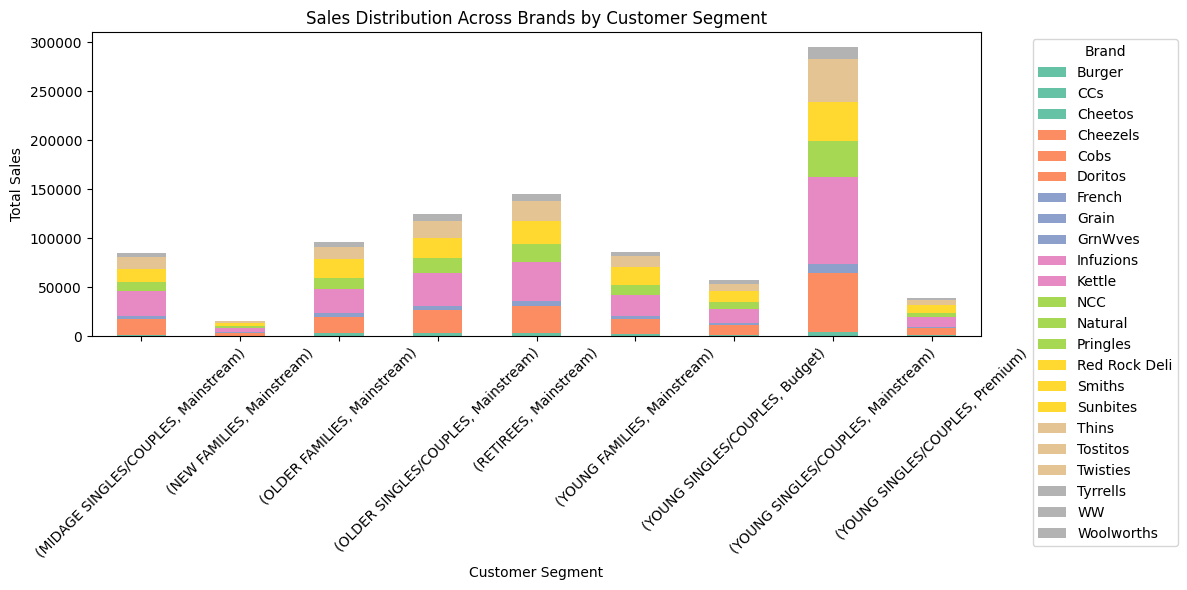

In [ ]:
# Create a pivot table for visualization
brand_sales_pivot = brand_sales_by_segment.pivot_table(values='TOT_SALES',
                                                      index=['LIFESTAGE', 'PREMIUM_CUSTOMER'],
                                                      columns='BRAND',
                                                      aggfunc='sum',
                                                      fill_value=0)

# Plot a stacked bar plot
brand_sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Sales Distribution Across Brands by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Therefore our target segment customers are MainStream Young singles/couples and they mostly buy Kettle, Doritos Followed by Pringles.

## Does our Target customers intend to buy larger bag of chips?

In [ ]:
avg_pack_size_target = segmented_data['PACK_SIZE'].mean()

rest_of_population = all_data[~((all_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
                          (all_data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

avg_pack_size_rest = rest_of_population['PACK_SIZE'].mean()

print(f"Average Pack Size (Target Segment): {avg_pack_size_target}")
print(f"Average Pack Size (Rest of Population): {avg_pack_size_rest}")


Average Pack Size (Target Segment): 176.07259789786997
Average Pack Size (Rest of Population): 175.34603602176094


In [ ]:
all_data['Segment'] = all_data.apply(lambda row: 'Target Segment' if
                         (row['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
                         (row['PREMIUM_CUSTOMER'] == 'Mainstream')
                         else 'Rest of Population', axis=1)

In [ ]:
import plotly.express as px

fig = px.box(all_data, x='Segment', y='PACK_SIZE',
             title='Pack Size Distribution: Target Segment vs Rest of Population',
             labels={'Segment': 'Customer Segment', 'PACK_SIZE': 'Pack Size'},
             color='Segment')

fig.show()


Output hidden; open in https://colab.research.google.com to view.

Most of our target customers purchase 170 - 175g the most.<br>The target segment has a more concentrated pack size distribution, while the rest of the population has a wider, more dispersed distribution.
<br>This suggests the target segment may have more homogeneous purchasing behavior or preferences compared to the overall population.

#Conclusion

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
 retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.